In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
accel_map = []

In [3]:
# Load the dataset
file_path = 'v_30.csv'  # replace with the actual path to your dataset
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,timestamp,x,y,z,yaw,v_horizontal,v_vertical,omega,velocity,steering_angle
0,1.734276e+09,4.418977,-6.163655,1.838047e-30,0.283386,1.196233,-0.040419,-0.039919,0.0,-0.00787
1,1.734276e+09,4.428899,-6.163755,-1.811615e-30,0.283564,1.202308,-0.041001,-0.037091,0.0,-0.00787
2,1.734276e+09,4.419900,-6.167616,6.505442e-33,0.284135,1.183721,-0.041007,-0.033320,0.0,-0.00787
3,1.734276e+09,4.448508,-6.160277,4.154071e-31,0.283209,1.191788,-0.039901,-0.036596,0.0,-0.00787
4,1.734276e+09,4.427450,-6.169392,-1.513398e-33,0.284152,1.162535,-0.045679,-0.038013,0.0,-0.00787


In [4]:
cmd_vel = data["velocity"]
actual_vel = data["v_horizontal"]

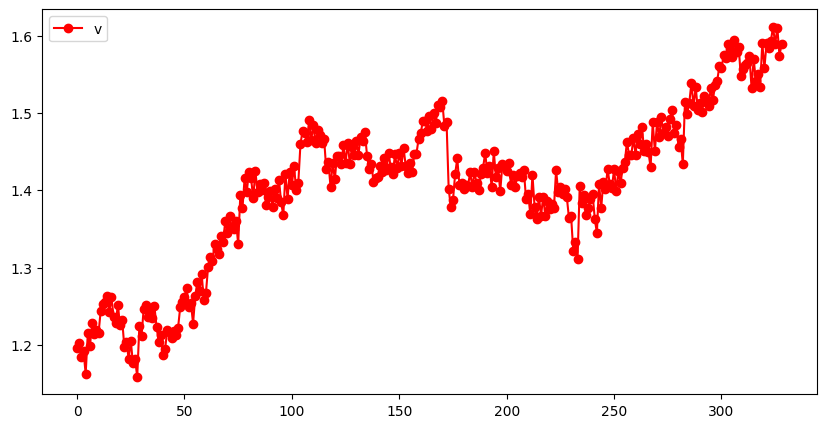

In [5]:
plt.figure(figsize = (10, 5))
# plt.plot(accel,"-bo",  label="accel")
plt.plot(actual_vel,"-ro",  label="v")

plt.legend()

plt.show()

In [6]:
max_actual_vel = actual_vel.max()


In [7]:
accel_map.append((30, max_actual_vel))
accel_map

[(30, 1.6115881160017642)]

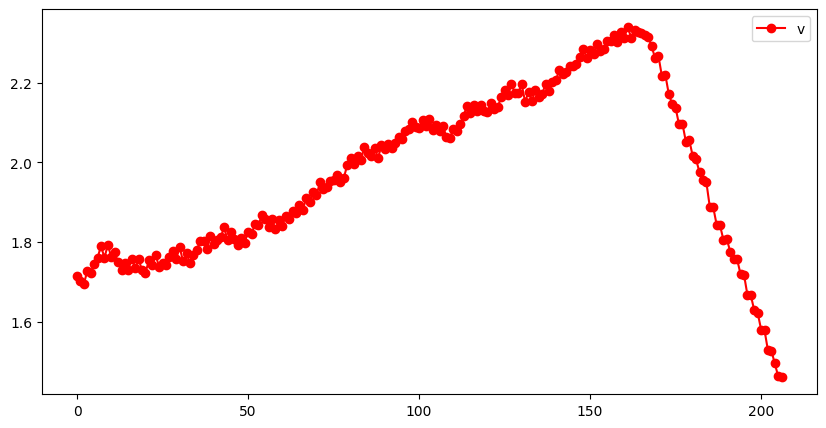

[(30, 1.6115881160017642), (50, 2.3396935943319868)]

In [8]:
# Load the dataset
file_path = 'v_50.csv'  # replace with the actual path to your dataset
data = pd.read_csv(file_path)

cmd_vel = data["velocity"]
actual_vel = data["v_horizontal"]
plt.figure(figsize = (10, 5))
# plt.plot(accel,"-bo",  label="accel")
plt.plot(actual_vel,"-ro",  label="v")

plt.legend()

plt.show()
accel_map.append((50,  actual_vel.max()))
accel_map

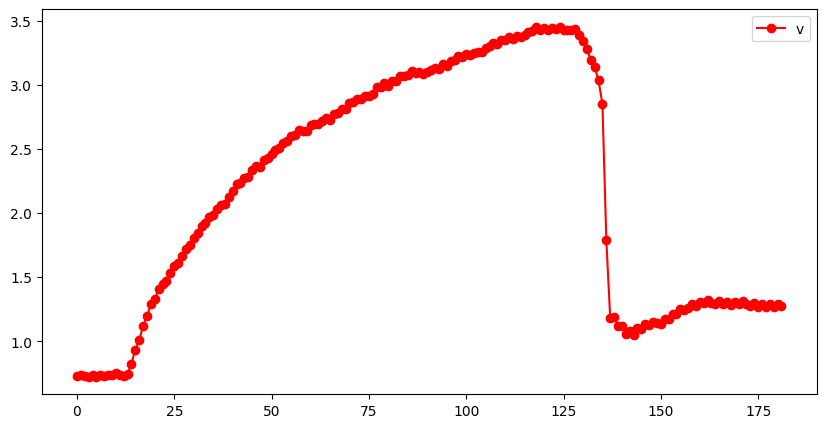

[(30, 1.6115881160017642), (50, 2.3396935943319868), (100, 3.4534095523156823)]

In [9]:
# Load the dataset
file_path = 'v_100.csv'  # replace with the actual path to your dataset
data = pd.read_csv(file_path)

cmd_vel = data["velocity"]
actual_vel = data["v_horizontal"]
plt.figure(figsize = (10, 5))
# plt.plot(accel,"-bo",  label="accel")
plt.plot(actual_vel,"-ro",  label="v")

plt.legend()
plt.show()
accel_map.append((100,  actual_vel.max()))
accel_map

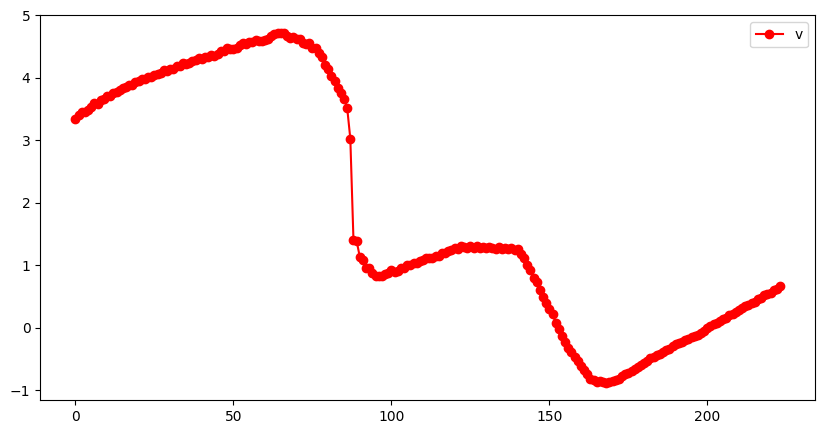

[(30, 1.6115881160017642),
 (50, 2.3396935943319868),
 (100, 3.4534095523156823),
 (150, 4.722974900511148)]

In [10]:
# Load the dataset
file_path = 'v_150.csv'  # replace with the actual path to your dataset
data = pd.read_csv(file_path)

cmd_vel = data["velocity"]
actual_vel = data["v_horizontal"]
plt.figure(figsize = (10, 5))
# plt.plot(accel,"-bo",  label="accel")
plt.plot(actual_vel,"-ro",  label="v")

plt.legend()

plt.show()
accel_map.append((150,  actual_vel.max()))
accel_map

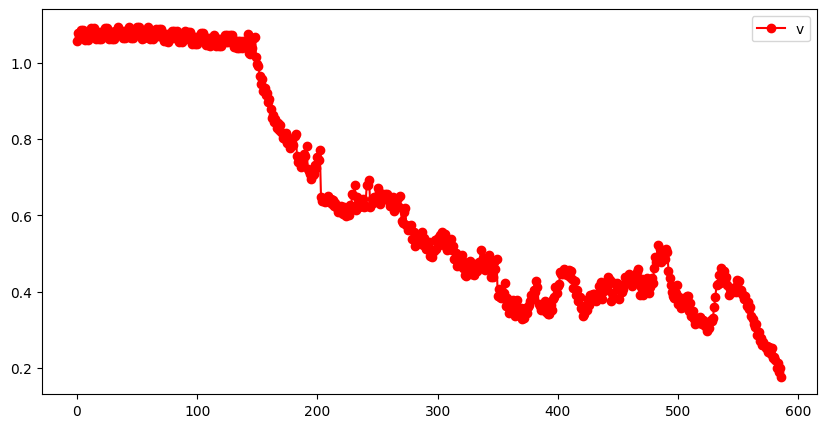

[(30, 1.6115881160017642),
 (50, 2.3396935943319868),
 (100, 3.4534095523156823),
 (150, 4.722974900511148),
 (-80, 0.176138010618996)]

In [11]:
# Load the dataset
file_path = 'v_-80.csv'  # replace with the actual path to your dataset
data = pd.read_csv(file_path)

cmd_vel = data["velocity"]
actual_vel = data["v_horizontal"]
plt.figure(figsize = (10, 5))
# plt.plot(accel,"-bo",  label="accel")
plt.plot(actual_vel,"-ro",  label="v")

plt.legend()

plt.show()
accel_map.append((-80,  actual_vel.min()))
accel_map

In [12]:
accel_map

[(30, 1.6115881160017642),
 (50, 2.3396935943319868),
 (100, 3.4534095523156823),
 (150, 4.722974900511148),
 (-80, 0.176138010618996)]

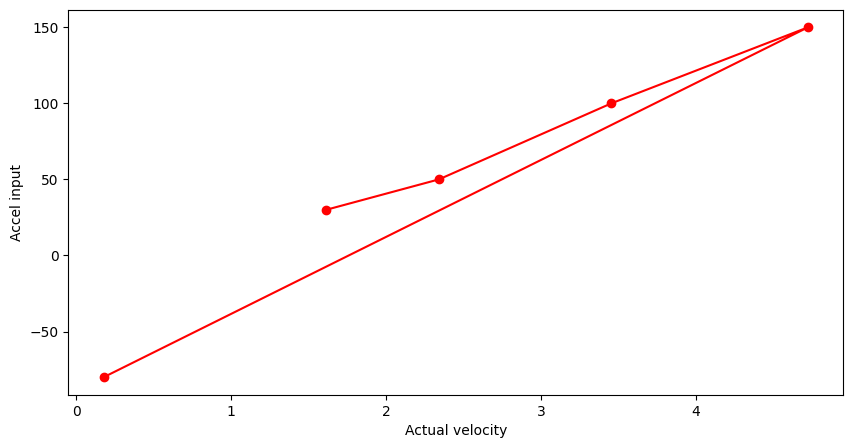

array([[ 30.        ,  50.        , 100.        , 150.        ,
        -80.        ],
       [  1.61158812,   2.33969359,   3.45340955,   4.7229749 ,
          0.17613801]])

In [13]:
plt.figure(figsize = (10, 5))
# plt.plot(accel,"-bo",  label="accel")
d = np.array(accel_map)
plt.plot(d.T[1], d.T[0],"-ro")
plt.ylabel('Accel input')
plt.xlabel('Actual velocity')
# plt.legend()

plt.show()
d.T

Mapping function (Actual to PWM): PWM = 48.9159 * Actual + -70.3703
Mapping function (PWM to Actual): Actual = 0.0198 * PWM + 1.4711


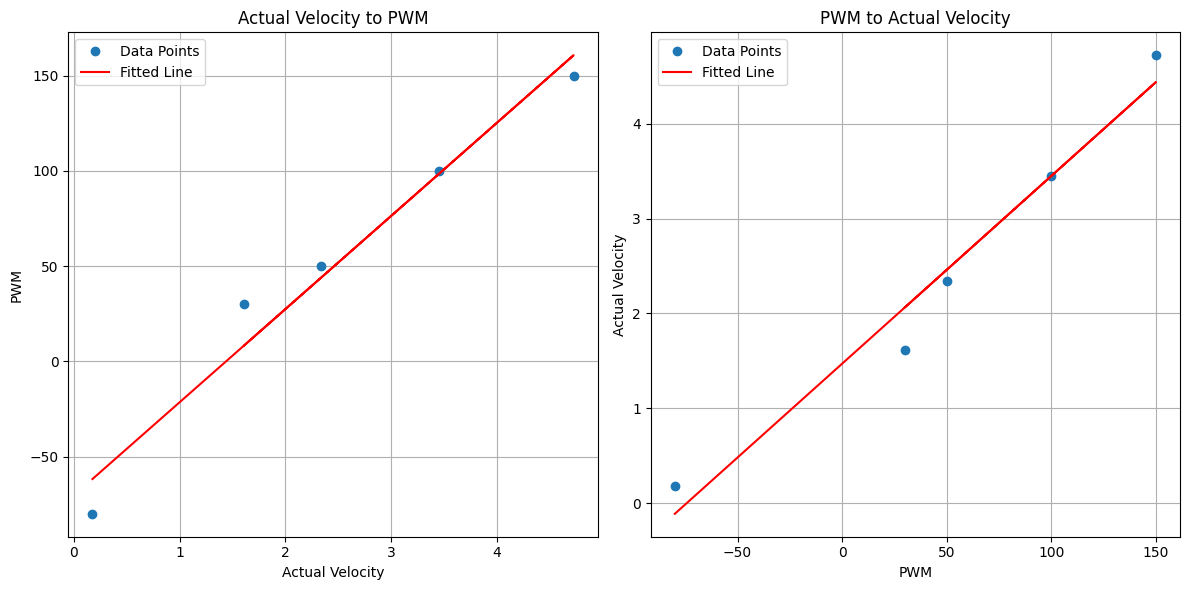

In [15]:
from sklearn.linear_model import LinearRegression

accel_map = np.array(accel_map)

# Extract actual and pseudo steer values
actual_accel = accel_map[:, 1].reshape(-1, 1)  # Actual steer (reshape for sklearn)
pseudo_accel = accel_map[:, 0].reshape(-1, 1)  # Pseudo steer

# Linear regression: Actual -> Pseudo
model_actual_to_pwm = LinearRegression()
model_actual_to_pwm.fit(actual_accel, pseudo_accel)

# Linear regression: Pseudo -> Actual
model_pwm_to_actual = LinearRegression()
model_pwm_to_actual.fit(pseudo_accel, actual_accel)

# Get the model parameters
slope_actual_to_pwm = model_actual_to_pwm.coef_[0][0]
intercept_actual_to_pwm = model_actual_to_pwm.intercept_[0]

slope_pwm_to_actual = model_pwm_to_actual.coef_[0][0]
intercept_pwm_to_actual = model_pwm_to_actual.intercept_[0]

# Print the results
print(f"Mapping function (Actual to PWM): PWM = {slope_actual_to_pwm:.4f} * Actual + {intercept_actual_to_pwm:.4f}")
print(f"Mapping function (PWM to Actual): Actual = {slope_pwm_to_actual:.4f} * PWM + {intercept_pwm_to_actual:.4f}")

# Plotting Actual to Pseudo
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_accel, pseudo_accel, 'o', label='Data Points')
plt.plot(actual_accel, model_actual_to_pwm.predict(actual_accel), 'r-', label='Fitted Line')
plt.xlabel('Actual Velocity')
plt.ylabel('PWM')
plt.title('Actual Velocity to PWM')
plt.legend()
plt.grid(True)

# Plotting Pseudo to Actual
plt.subplot(1, 2, 2)
plt.plot(pseudo_accel, actual_accel, 'o', label='Data Points')
plt.plot(pseudo_accel, model_pwm_to_actual.predict(pseudo_accel), 'r-', label='Fitted Line')
plt.xlabel('PWM')
plt.ylabel('Actual Velocity')
plt.title('PWM to Actual Velocity')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()